In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
#Read Parquet file
df = pd.read_parquet('zippedData/merged_data.parquet')

In [6]:
#Add column to Df of properly formatted year
df['year'] = df['release_date'].dt.year
#Create new Df for only values with year 2012 or greater
genre = df.loc[df['year']>= 2012]
#Explode original Df by genre
genre_all = df.explode('genres')
#Explode year filtered Df by genre
genre = genre.explode('genres')

In [7]:
#Create new Df of top 6 genres from all years Df
genre_all = genre_all[genre_all.genres.isin(['Sci-Fi', 'Mystery', 'Horror', 'Thriller','Romance', 'Animation'])]
#Select the medians each genre for each year
graph_all = genre_all.groupby(['year','genres']).median()
#Reset the index
graph_all.reset_index(inplace = True)

In [8]:
#Create Df of median by year (not broken up by genre)
ROI_by_year = genre_all.groupby('year').ROI.median()

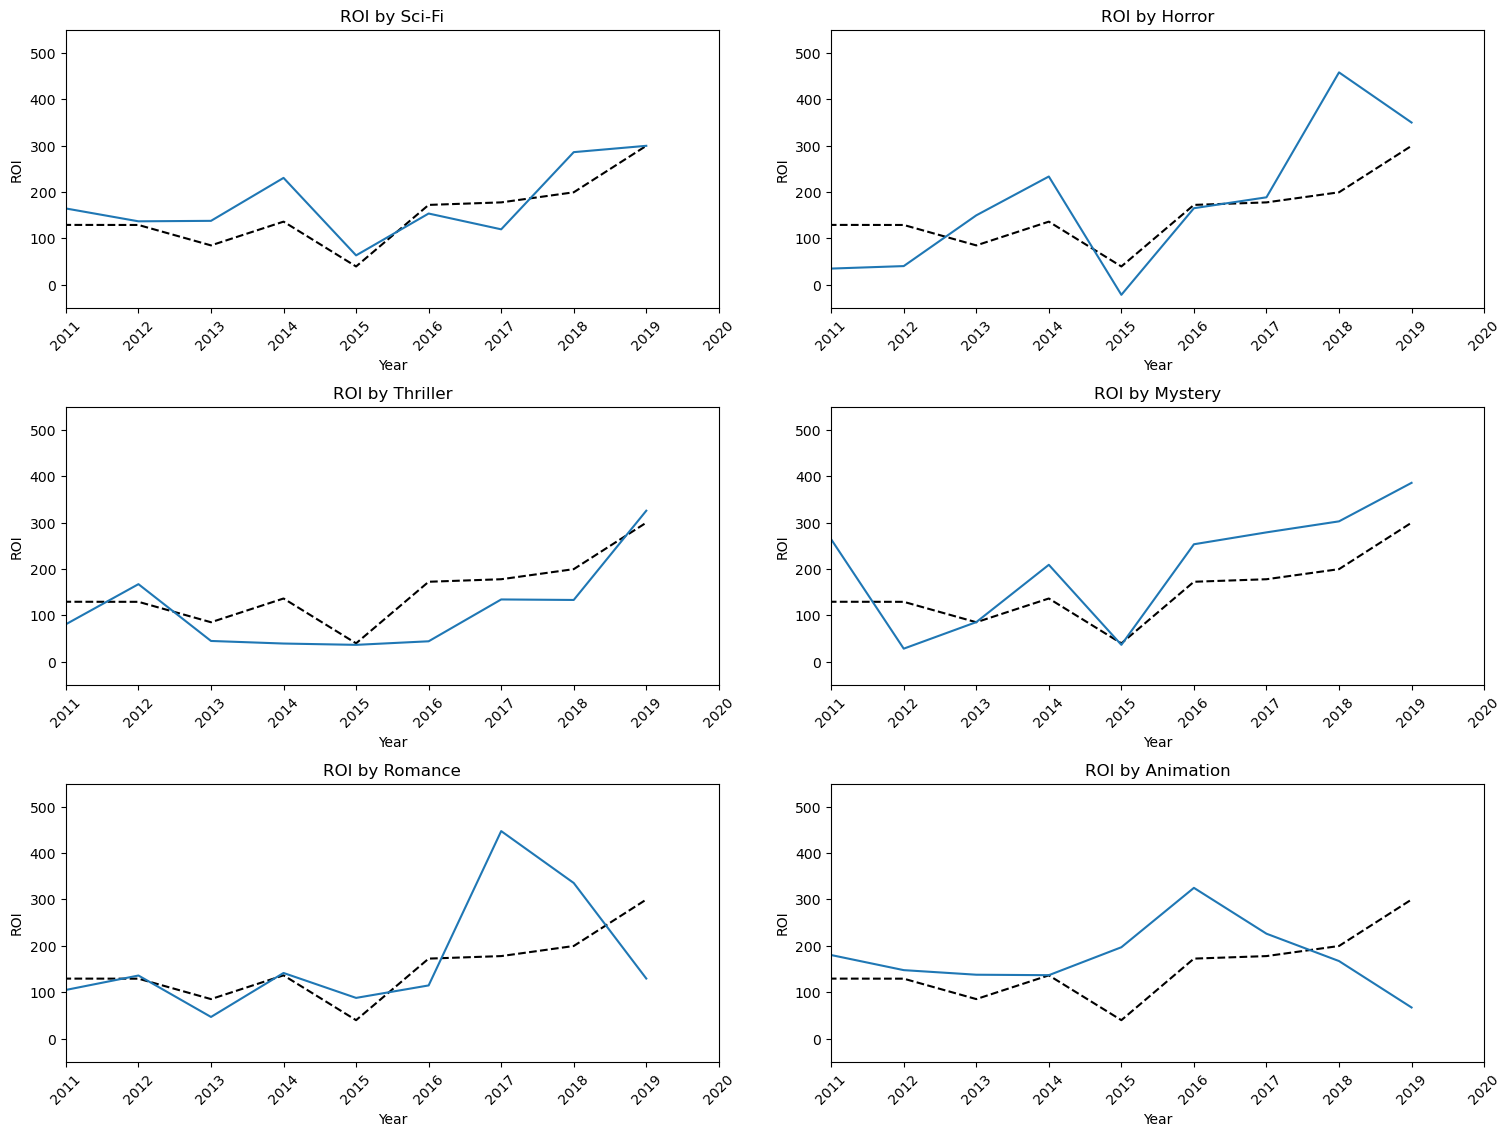

In [9]:
#Plot all the top 6 genre medians between 2011 and 2019
fig, ax = plt.subplots(3,2,figsize = (16,12))
plt.tight_layout(pad = 5.0)
#Loop through unique genre names to plot to the 3 x 2 ax matrix
for index, gen in enumerate(list(graph_all.genres.unique())):
    axis = ax[index % 3][index // 3]
    sns.lineplot(x = ROI_by_year.index, y = ROI_by_year.values, color = 'black', linestyle = '--', ax = axis)
    sns.lineplot(data = graph_all,
                 x = 'year', y = graph_all.loc[graph_all.genres == gen].ROI,
                 ax = axis)
    axis.set_xlim([2011,2020])
    axis.set_ylim([-50,550])
    axis.set_xlabel('Year')
    axis.set_title(f'ROI by {gen}')
    axis.xaxis.set_major_locator(plt.MultipleLocator(1))
    #Loop through each axis tick and rotate
    for tick in axis.get_xticklabels():
        tick.set_rotation(45)

plt.show()

In [10]:
#Explode genre Df since 2012 on Director
genre_dir = genre.explode('director')

In [11]:
#Create a Df for each of the top 6 genres and create the ROI_diff to standardize for comparison
animation = genre_dir.loc[genre_dir['genres']== 'Animation']
animation['ROI_diff'] = (animation['ROI'] - animation['ROI'].mean()) / animation['ROI'].mean() 
scifi = genre_dir.loc[genre_dir['genres']== 'Sci-Fi']
scifi['ROI_diff'] = (scifi['ROI'] - scifi['ROI'].mean()) / scifi['ROI'].mean() 
adventure = genre_dir.loc[genre_dir['genres']== 'Adventure']
adventure['ROI_diff'] = (adventure['ROI'] - adventure['ROI'].mean()) / adventure['ROI'].mean()
fantasy = genre_dir.loc[genre_dir['genres']== 'Fantasy']
fantasy['ROI_diff'] = (fantasy['ROI'] - fantasy['ROI'].mean()) / fantasy['ROI'].mean()
family = genre_dir.loc[genre_dir['genres']== 'Family']
family['ROI_diff'] = (family['ROI'] - family['ROI'].mean()) / family['ROI'].mean()
horror = genre_dir.loc[genre_dir['genres']== 'Horror']
horror['ROI_diff'] = (horror['ROI'] - horror['ROI'].mean()) / horror['ROI'].mean()
mystery = genre_dir.loc[genre_dir['genres']== 'Mystery']
mystery['ROI_diff'] = (mystery['ROI'] - mystery['ROI'].mean()) / mystery['ROI'].mean()

C:\Users\capta\AppData\Local\Temp\ipykernel_14124\2163577577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animation['ROI_diff'] = (animation['ROI'] - animation['ROI'].mean()) / animation['ROI'].mean()
C:\Users\capta\AppData\Local\Temp\ipykernel_14124\2163577577.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scifi['ROI_diff'] = (scifi['ROI'] - scifi['ROI'].mean()) / scifi['ROI'].mean()
C:\Users\capta\AppData\Local\Temp\ipykernel_14124\2163577577.py:7: SettingWithCopyWarning: 
A value is trying to

In [12]:
#Create Df of the top 5 directors of each of the top genres
animation_dir = animation.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
animation_top = animation_dir.ROI_diff
animation_top = animation_top.to_frame()
animation_top['genre'] = ['Animation','Animation','Animation','Animation','Animation']
scifi_dir = scifi.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
scifi_top = scifi_dir.ROI_diff
scifi_top = scifi_top.to_frame()
scifi_top['genre'] = ['Sci-Fi','Sci-Fi','Sci-Fi','Sci-Fi','Sci-Fi']
adventure_dir = adventure.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
adventure_top = adventure_dir.ROI_diff
adventure_top = adventure_top.to_frame()
adventure_top['genre'] = ['Adventure','Adventure','Adventure','Adventure','Adventure']
fantasy_dir = fantasy.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
fantasy_top = fantasy_dir.ROI_diff
fantasy_top = fantasy_top.to_frame()
fantasy_top['genre'] = ['Fantasy','Fantasy','Fantasy','Fantasy','Fantasy']
family_dir = family.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
family_top = family_dir.ROI_diff
family_top = family_top.to_frame()
family_top['genre'] = ['Family','Family','Family','Family','Family']
horror_dir = horror.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
horror_top = horror_dir.ROI_diff
horror_top = horror_top.to_frame()
horror_top['genre'] = ['Horror','Horror','Horror','Horror','Horror']
mystery_dir = mystery.groupby('director').mean().sort_values('ROI_diff', ascending = False).head(5)
mystery_top = mystery_dir.ROI_diff
mystery_top = mystery_top.to_frame()
mystery_top['genre'] = ['Mystery','Mystery','Mystery','Mystery','Mystery']
# Select Dfs' to use for pd.concat
frames = [adventure_top, animation_top, scifi_top, fantasy_top, family_top, horror_top, mystery_top]
# Concatenate all the top directors by genre
top_all = pd.concat(frames)
# Get the top 15 overall directors of the top genres
top_15 = top_all.sort_values('ROI_diff', ascending = False).head(15)
top_15 = top_15.reset_index()

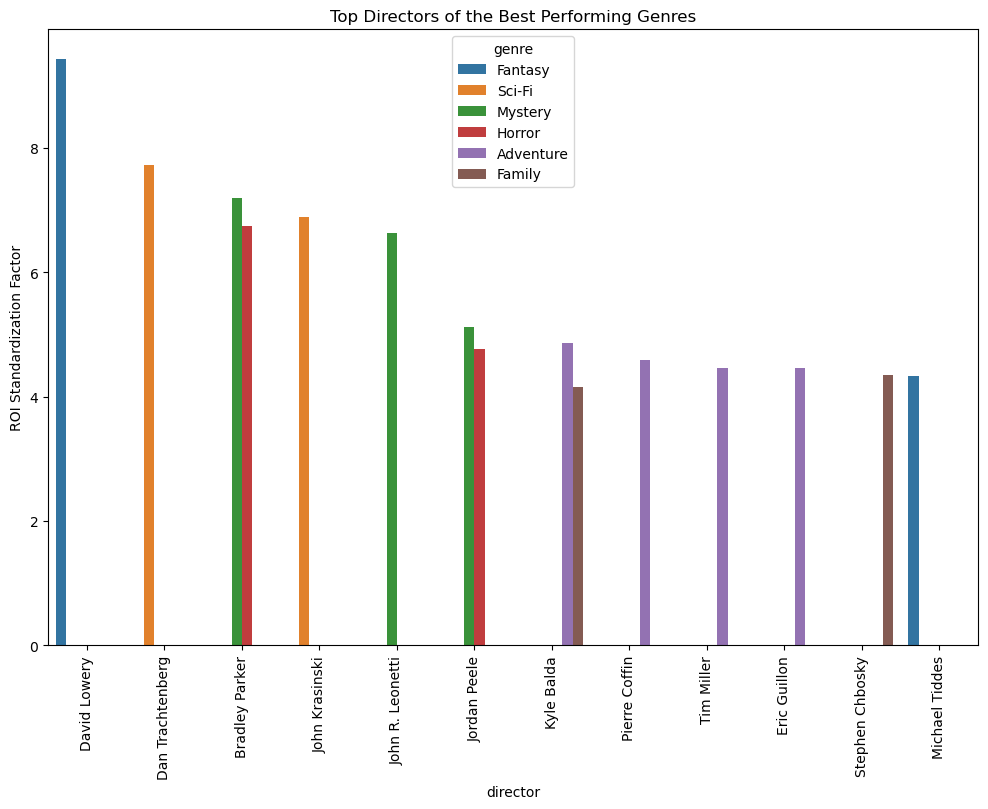

In [13]:
#Plot the top 15 Directors of the top genres
fig, ax = plt.subplots(figsize=(12,8))

sns.barplot(data = top_15, x = 'director', y = 'ROI_diff', hue = 'genre')
plt.xticks(rotation=90)
plt.title('Top Directors of the Best Performing Genres')
plt.ylabel('ROI Standardization Factor');